# Giriş işlemleri

In [1]:
import os
is_colab = False # eğer colab kullanıyorsanız True yapın
if is_colab:
    from google.colab import drive
    drive.mount('/content/drive')
    root_path = "/content/drive/MyDrive/gsm8k-tr-semantik-analiz/benzerlik_olcumu"
else:
    root_path = os.getcwd()  # dosyanın bulunduğu klasör
print(root_path)

c:\Users\kayra\OneDrive\Masaüstü\gsm8k-tr-semantik-analiz\benzerlik_olcumu


## Gerekli kütüphaneleri yükle

In [2]:
import subprocess

# Gereksinimler dosyasının yolu
requirements_path = os.path.join(root_path, "gereksinimler.txt")

# Gereksinimler yükleniyor
try:
    print("Gereksinimler yükleniyor...")
    subprocess.run(
        ["pip", "install", "-r", requirements_path],
        check=True,
        stdout=subprocess.DEVNULL,  # Çıktıyı gizler
        stderr=subprocess.DEVNULL   # Hataları gizler
    )
    print("Gereksinimler başarıyla yüklendi.")
except subprocess.CalledProcessError as e:
    print("Gereksinimler yüklenirken hata oluştu.")
except FileNotFoundError:
    print(f"Dosya bulunamadı: {requirements_path}")

Gereksinimler yükleniyor...
Gereksinimler başarıyla yüklendi.


## Dosya dizinini sistem yoluna ekle

In [3]:
import sys

sys.path.append(root_path)
print(f"'{root_path}' kütüphane arama yoluna eklendi.")

'c:\Users\kayra\OneDrive\Masaüstü\gsm8k-tr-semantik-analiz\benzerlik_olcumu' kütüphane arama yoluna eklendi.


## Yerel kod dosyalarını içe aktar

In [4]:
%%capture
!pip install ipywidgets
!pip install --upgrade jupyter

In [5]:
from dosya_islemleri import (load_model, load_dataset, read_embedding_from_file, read_probability_from_file, read_top1_top5_results_json)
from benzerlik_islemleri import calculate_and_save_similarity_scores, get_and_save_all_top5_matches
from gorsellestir import save_tsne_png, plot_two_tsne_results, plot_t1_t5_scores
from gomme_islemleri import (calculate_and_save_raw_embeddings_from_dataset, tsne_sonuc_olustur, get_multi_token_embeddings, 
                             apply_multi_tsne)
from top_islemleri import calculate_top1_top5_scores

## Cihaz tipini al

In [6]:
import torch
# cihaz tipini al
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Kullanılan cihaz tipi: {device}")

Kullanılan cihaz tipi: cpu


## Modelleri tanımla

In [7]:
model_names = [
    "intfloat/multilingual-e5-base",                                # 278M  - 81
    "ibm-granite/granite-embedding-107m-multilingual",              # 107M  - 48
    "intfloat/multilingual-e5-small",                               # 118M  - 36
    "sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2",  # 118M  - 62
    "shibing624/text2vec-base-multilingual",                        # 118M  - 77 
    "ytu-ce-cosmos/turkish-colbert"
    ]

## Veri kümesini yükle

In [8]:
# veri kümesi yükleniyor
df = load_dataset()
print(df.head())

Veri kümesi yükleniyor: c:\Users\kayra\OneDrive\Masaüstü\gsm8k-tr-semantik-analiz\benzerlik_olcumu\..\gsm8k_tr_1000_soru_cevap.csv
                                            question  \
0  eğer çiftçi steven traktörüyle günde 10 dönüm ...   
1  bir restoranda 4 ayaklı 40 masa ve 3 ayaklı 50...   
2  billy ve jenny'nin her biri 5 dolarlık bir içk...   
3  büyükanne olga'nın 3 kızı ve 3 oğlu vardır.  k...   
4  okulda 14 erkek ve 10 kız öğrenci vardır. eğer...   

                                              answer  index  
0  çiftçi steven'ın 55 dönümlük tarlasını sürmesi...      0  
1  restoranda 4 ayaklı 40 masa ve 3 ayaklı 50 mas...      1  
2  billy ve jenny'nin toplam yemek ücreti:\r\n(2 ...      2  
3  büyükanne olga'nın toplamda 3 kızı ve her bir ...      3  
4                           10 erkek ve 7 kız kalır.      4  


In [9]:
def get_save_prefix(model_name):
    return model_name.replace("/", "_").replace("-", "_")

# Gömme (embedding) hesaplama işleri

In [ ]:
# her model için
for i, model_name in enumerate(model_names):
        save_prefix = get_save_prefix(model_name)
        model, tokenizer = load_model(model_name, device_type=device)
        calculate_and_save_raw_embeddings_from_dataset(model, tokenizer, df, save_prefix, device) # sonuçlar embeddings klasörüne kaydedilir
        print(f"Embeddingler hesaplandı ve kaydedildi: {model_name} ({i+1}/{len(model_names)})")

# Gömmeleri görselleştirme

intfloat_multilingual_e5_base_embeddings.json dosyasından 70 gömme vektörü yüklendi.


C:\Users\kayra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Sistem belirtilen dosyayı bulamıyor
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\kayra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 550, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  Fil

Görselleştirme kaydedildi: c:\Users\kayra\OneDrive\Masaüstü\gsm8k-tr-semantik-analiz\benzerlik_olcumu\tsne_results\intfloat_multilingual_e5_base_tsne_results.png
ibm_granite_granite_embedding_107m_multilingual_embeddings.json dosyasından 70 gömme vektörü yüklendi.
Görselleştirme kaydedildi: c:\Users\kayra\OneDrive\Masaüstü\gsm8k-tr-semantik-analiz\benzerlik_olcumu\tsne_results\ibm_granite_granite_embedding_107m_multilingual_tsne_results.png
intfloat_multilingual_e5_small_embeddings.json dosyasından 70 gömme vektörü yüklendi.
Görselleştirme kaydedildi: c:\Users\kayra\OneDrive\Masaüstü\gsm8k-tr-semantik-analiz\benzerlik_olcumu\tsne_results\intfloat_multilingual_e5_small_tsne_results.png
sentence_transformers_paraphrase_multilingual_MiniLM_L12_v2_embeddings.json dosyasından 70 gömme vektörü yüklendi.
Görselleştirme kaydedildi: c:\Users\kayra\OneDrive\Masaüstü\gsm8k-tr-semantik-analiz\benzerlik_olcumu\tsne_results\sentence_transformers_paraphrase_multilingual_MiniLM_L12_v2_tsne_results.png

KeyboardInterrupt: 

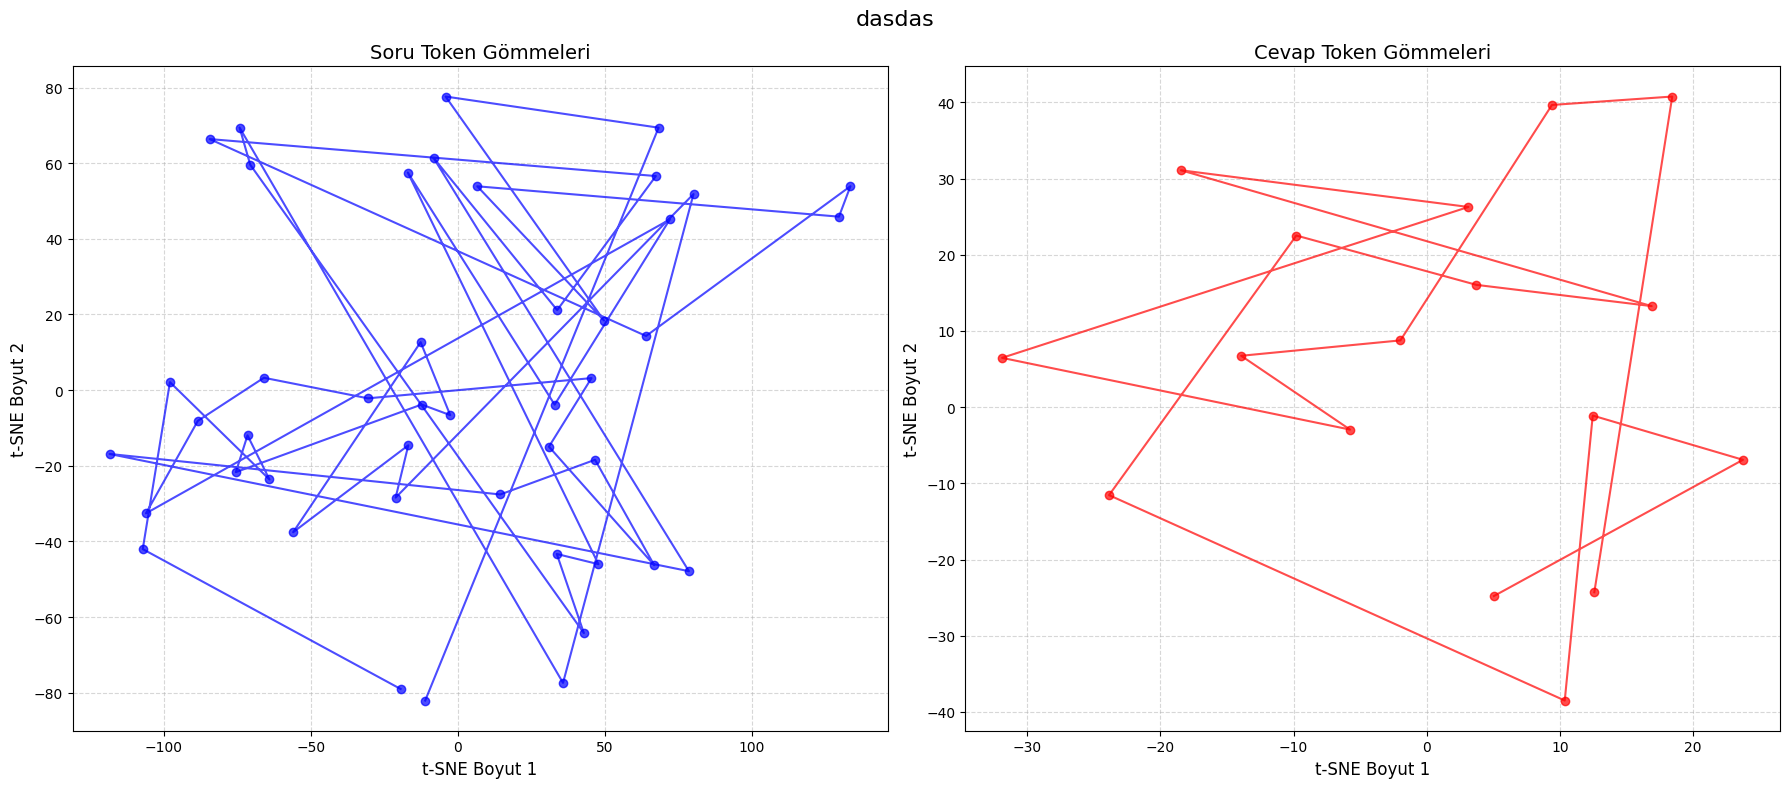

In [ ]:
# TODO: Değiştirilebilir
import random
examples = []
for i in range(10):
    random_index = random.randint(0, len(df) - 1)
    examples.append(random_index)
for i, model_name in enumerate(model_names):
    model, tokenizer = load_model(model_name, device_type=device)
    save_prefix = get_save_prefix(model_name)
    raw_embeddings = read_embedding_from_file(save_prefix)
    tsne_res = tsne_sonuc_olustur(raw_embeddings, save_prefix)  # sonuçlar tsne_results klasörüne kaydedilir (json olarak)
    save_tsne_png(tsne_res, save_prefix)                        # sonuçlar tsne_results klasörüne kaydedilir
    for idx in examples:
        example_item = df.iloc[idx]
        # bu kısım örnek amaçlı her model için ilk soru ve cevabın gömmelerini görselleştirir
        question_multi_token_embeddings = get_multi_token_embeddings(model, tokenizer, example_item["question"], device)
        question_multi_tsne = apply_multi_tsne(question_multi_token_embeddings)
        answer_multi_token_embeddings = get_multi_token_embeddings(model, tokenizer, example_item["answer"], device)
        answer_multi_tsne = apply_multi_tsne(answer_multi_token_embeddings)
        plot_two_tsne_results(question_multi_tsne, answer_multi_tsne, save_prefix, idx, label1="Soru", label2="Cevap", title=model_name)


# Gömmelere göre benzerlik skoru hesaplama

In [ ]:
for i, model_name in enumerate(model_names):
    save_prefix = get_save_prefix(model_name)
    raw_embeddings = read_embedding_from_file(save_prefix)
    calculate_and_save_similarity_scores(raw_embeddings, save_prefix, device)

# Benzerlik sonuçlarına göre top1-top5 doğruluk oranlarını hesaplama

In [ ]:
for i, model_name in enumerate(model_names):
    save_prefix = get_save_prefix(model_name)
    similarity_scores = read_probability_from_file(save_prefix)
    get_and_save_all_top5_matches(similarity_scores, save_prefix)           # sonuçlar top1_top5_results klasörüne kaydedilir (json olarak)
    print(f"Benzerlikler hesaplandı ve kaydedildi: {model_name} ({i+1}/{len(model_names)})")

# Top1 - Top5 doğruluk oranlarını görselleştirme

In [ ]:
answer_top_scores = []
question_top_scores = []
for i, model_name in enumerate(model_names):
    save_prefix = get_save_prefix(model_name)
    question_results = read_top1_top5_results_json(save_prefix, is_question_to_answer=True)
    answer_results = read_top1_top5_results_json(save_prefix, is_question_to_answer=False)
    question_top1_top5 = calculate_top1_top5_scores(question_results, model_name)
    answer_top1_top5 = calculate_top1_top5_scores(answer_results, model_name)
    question_top_scores.append(question_top1_top5)
    answer_top_scores.append(answer_top1_top5)
    print(f"Top1 ve Top5 skorları hesaplandı: {model_name} ({i+1}/{len(model_names)})\r")
plot_t1_t5_scores(answer_top_scores, question_top_scores)                                   # sonuç top1_top5_results klasörüne kaydedilir (png olarak)